# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [74]:
# Read csv"
data = pd.read_csv("https://raw.githubusercontent.com/globalaihub/introduction-to-machine-learning/main/Final%20Project/diamonds.csv")
data

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
6,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,Very Low
7,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,Very Low
8,9,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,Very Low
9,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,Very Low


In [75]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
index      53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
price      53940 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


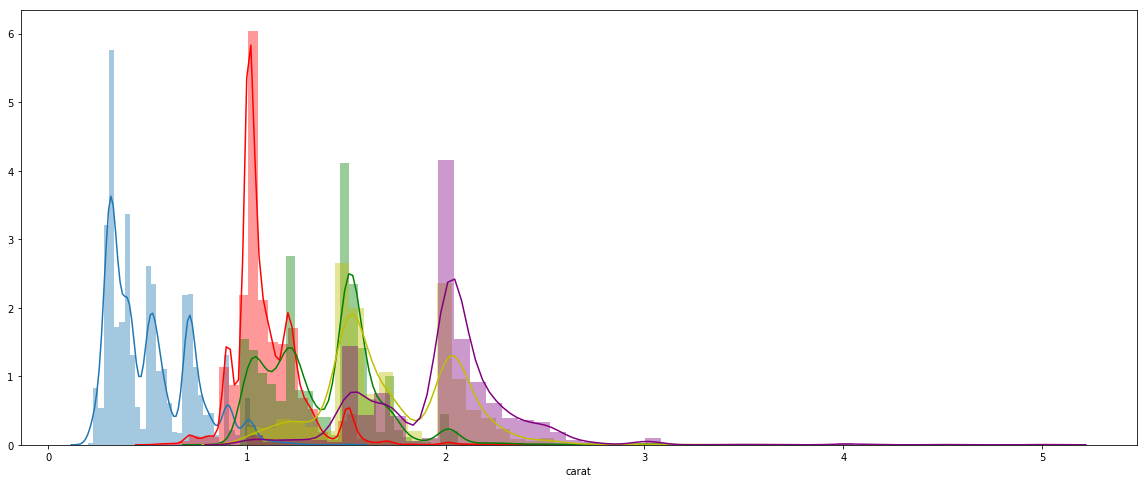

In [76]:

plt.figure(figsize=(20, 8))
sns.distplot(data[data.price == "Very Low"].carat)
sns.distplot(data[data.price == "Low"].carat,color="r")
sns.distplot(data[data.price == "Medium"].carat,color="g")
sns.distplot(data[data.price == "High"].carat,color="y")
sns.distplot(data[data.price == "Very High"].carat,color="purple")

In [77]:

data.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [78]:
data.price.value_counts()  #imbalanced data

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

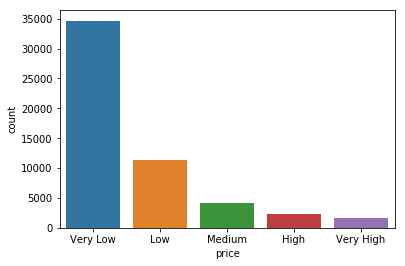

In [79]:
ax = sns.countplot(x="price", data=data)

In [80]:
#Encoding
cut=data.iloc[:,2:3]
color=data.iloc[:,3:4]
clarity=data.iloc[:,4:5]
price=data.iloc[:,10:11]

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [82]:
cut['cut']=le.fit_transform(cut['cut'])

In [83]:
color['color']=le.fit_transform(color['color'])

In [84]:
clarity['clarity']=le.fit_transform(clarity['clarity'])

In [85]:
price['price']=le.fit_transform(price['price'])

In [86]:
data3 = pd.concat([cut, clarity, color, price], axis=1)

In [87]:
data2 = data.drop([ "index","cut","color","clarity","price"],axis=1)

In [89]:
data= pd.concat([data2,data3], axis=1)
data

,carat,depth,table,x,y,z,cut,clarity,color,price
0,0.23,61.5,55.0,3.95,3.98,2.43,2,3,1,4
1,0.21,59.8,61.0,3.89,3.84,2.31,3,2,1,4
2,0.23,56.9,65.0,4.05,4.07,2.31,1,4,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5,4
4,0.31,63.3,58.0,4.34,4.35,2.75,1,3,6,4
5,0.24,62.8,57.0,3.94,3.96,2.48,4,7,6,4
6,0.24,62.3,57.0,3.95,3.98,2.47,4,6,5,4
7,0.26,61.9,55.0,4.07,4.11,2.53,4,2,4,4
8,0.22,65.1,61.0,3.87,3.78,2.49,0,5,1,4
9,0.23,59.4,61.0,4.00,4.05,2.39,4,4,4,4


In [90]:
data.isna().sum() #no missing value

carat      0
depth      0
table      0
x          0
y          0
z          0
cut        0
clarity    0
color      0
price      0
dtype: int64

In [91]:
data.duplicated().sum() #342 dublicated value

342

In [94]:
data=data.drop_duplicates()

In [95]:
data.duplicated().sum() #342 dublicated value

0

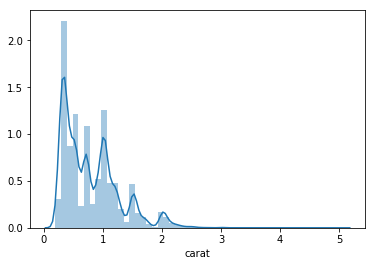

In [96]:
sns.distplot(data.carat)

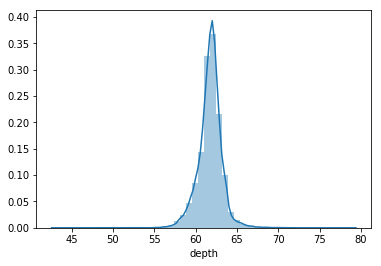

In [97]:
sns.distplot(data.depth)

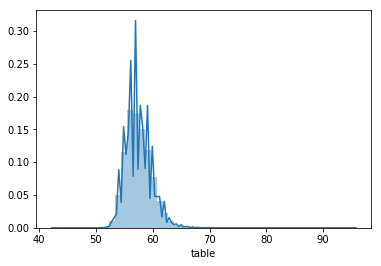

In [98]:
sns.distplot(data.table)

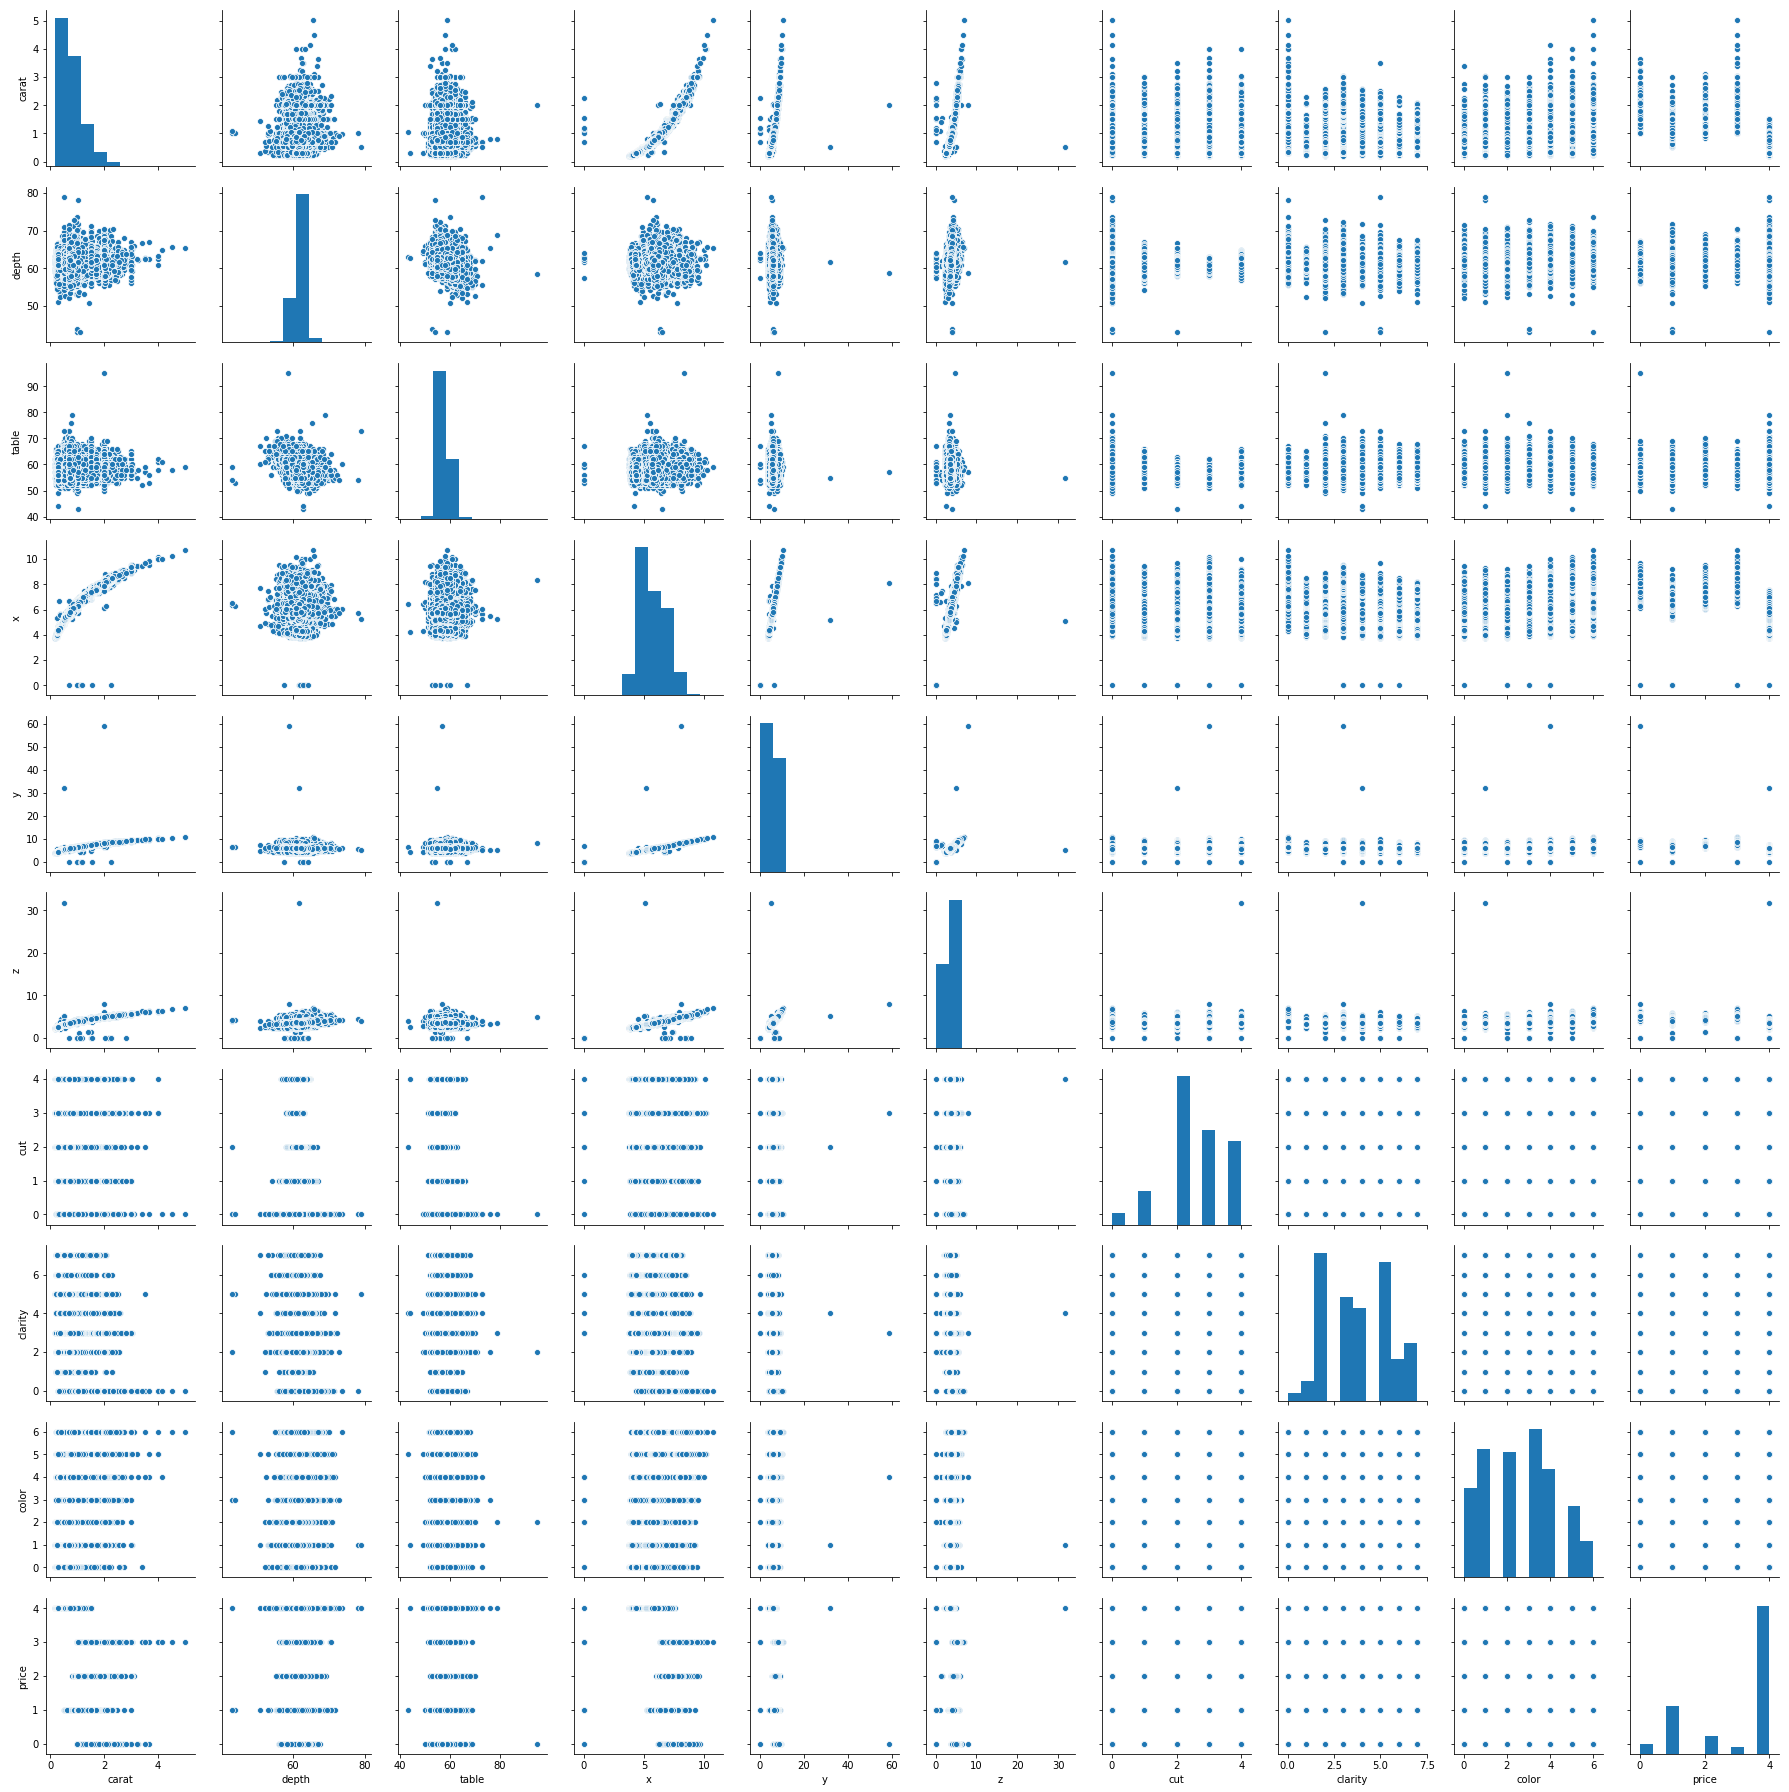

In [133]:
sns.pairplot(data)

In [100]:
# Draw correlation matrix
data.corr()

,carat,depth,table,x,y,z,cut,clarity,color,price
carat,1.000000,0.028400,0.180795,0.975362,0.951795,0.953437,0.016725,-0.214509,0.289799,-0.714825
depth,0.028400,1.000000,-0.297230,-0.024843,-0.028921,0.095258,-0.193144,-0.053423,0.047675,-0.010770
table,0.180795,-0.297230,1.000000,0.194475,0.182893,0.149947,0.150706,-0.088019,0.025887,-0.126524
x,0.975362,-0.024843,0.194475,1.000000,0.974491,0.970590,0.021532,-0.226003,0.268707,-0.734217
y,0.951795,-0.028921,0.182893,0.974491,1.000000,0.951672,0.026732,-0.217852,0.262022,-0.718228
z,0.953437,0.095258,0.149947,0.970590,0.951672,1.000000,0.001394,-0.224524,0.266669,-0.718705
cut,0.016725,-0.193144,0.150706,0.021532,0.026732,0.001394,1.000000,0.028377,0.000038,-0.048204
clarity,-0.214509,-0.053423,-0.088019,-0.226003,-0.217852,-0.224524,0.028377,1.000000,-0.028204,0.120168
color,0.289799,0.047675,0.025887,0.268707,0.262022,0.266669,0.000038,-0.028204,1.000000,-0.161595
price,-0.714825,-0.010770,-0.126524,-0.734217,-0.718228,-0.718705,-0.048204,0.120168,-0.161595,1.000000


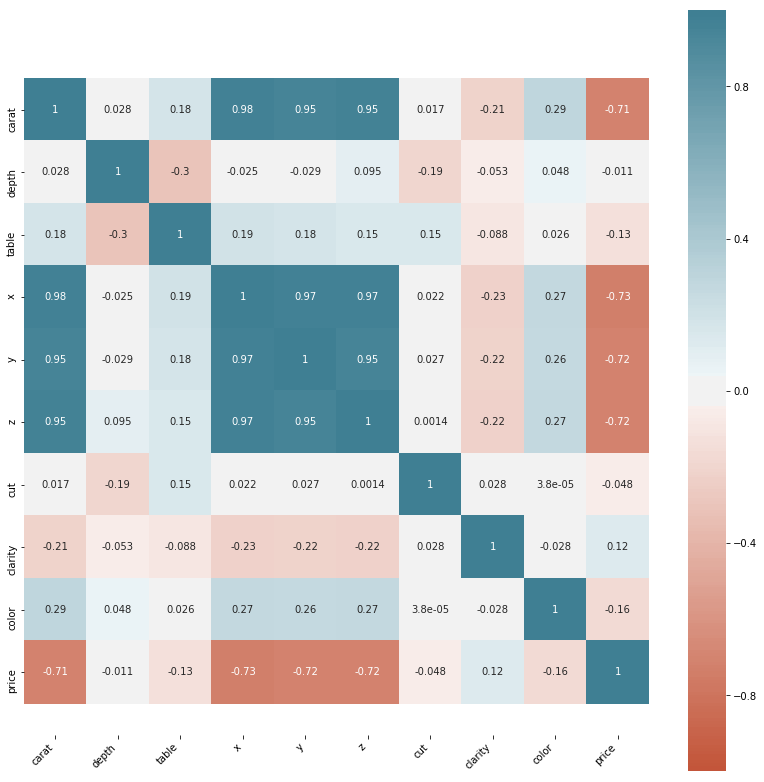

In [101]:
# Correlation of the features   #no need to drop out feature
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [107]:
# Outlier detection with Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[1.19957927, 0.17379443, 1.10027688, ..., 0.48489534, 0.93637193,
        0.70344874],
       [1.24185856, 1.3632216 , 1.58743436, ..., 1.06478335, 0.93637193,
        0.70344874],
       [1.19957927, 3.39224442, 3.37924186, ..., 0.09499266, 0.93637193,
        0.70344874],
       ...,
       [0.2060159 , 0.73576752, 1.13948249, ..., 1.06478335, 1.52428354,
        0.70344874],
       [0.13221843, 0.52362595, 0.24357874, ..., 0.48489534, 0.8273629 ,
        0.70344874],
       [0.10031767, 0.3159697 , 1.10027688, ..., 0.48489534, 1.52428354,
        0.70344874]])

In [108]:
len(np.where(z > 3)[0])

1565

In [131]:
outliers = list(set(np.where(z > 3)[0]))
data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(data)

KeyError: '[24608 17103 25588 25591 26071 26415 26608 26664  2176 27047 27333 27518\n 37506  5149 40694] not found in axis'

In [113]:
X = data.iloc[:,0:9]
X

,carat,depth,table,x,y,z,cut,clarity,color
0,0.23,61.5,55.0,3.95,3.98,2.43,2,3,1
1,0.21,59.8,61.0,3.89,3.84,2.31,3,2,1
2,0.23,56.9,65.0,4.05,4.07,2.31,1,4,1
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,3,6
5,0.24,62.8,57.0,3.94,3.96,2.48,4,7,6
6,0.24,62.3,57.0,3.95,3.98,2.47,4,6,5
7,0.26,61.9,55.0,4.07,4.11,2.53,4,2,4
8,0.22,65.1,61.0,3.87,3.78,2.49,0,5,1
9,0.23,59.4,61.0,4.00,4.05,2.39,4,4,4


In [114]:
y = data.iloc[:,9:10]
y

,price
0,4
1,4
2,4
3,4
4,4
5,4
6,4
7,4
8,4
9,4


In [115]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-1.19957927, -0.17379443, -1.10027688, ..., -0.54017686,
        -0.48489534, -0.93637193],
       [-1.24185856, -1.3632216 ,  1.58743436, ...,  0.43271872,
        -1.06478335, -0.93637193],
       [-1.19957927, -3.39224442,  3.37924186, ..., -1.51307244,
         0.09499266, -0.93637193],
       ...,
       [-0.2060159 ,  0.73576752,  1.13948249, ...,  1.4056143 ,
        -1.06478335, -1.52428354],
       [ 0.13221843, -0.52362595,  0.24357874, ...,  0.43271872,
        -0.48489534,  0.8273629 ],
       [-0.10031767,  0.3159697 , -1.10027688, ..., -0.54017686,
        -0.48489534, -1.52428354]])

In [116]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

In [128]:
# Import Decision Tree 
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf1.fit(X_train,y_train)
pred = clf1.predict(X_test)
print(classification_report(y_test,pred))
cm1= confusion_matrix(y_test, pred)
cm1

              precision    recall  f1-score   support

           0       0.44      0.49      0.47       660
           1       0.76      0.81      0.79      3332
           2       0.64      0.52      0.57      1228
           3       0.62      0.58      0.60       475
           4       0.96      0.96      0.96     10385

    accuracy                           0.86     16080
   macro avg       0.68      0.67      0.68     16080
weighted avg       0.86      0.86      0.86     16080



array([[ 325,   25,  171,  139,    0],
       [  51, 2704,  174,    7,  396],
       [ 186,  379,  636,   25,    2],
       [ 170,   12,   17,  276,    0],
       [   3,  427,    1,    0, 9954]])

In [129]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train,y_train)
pred = clf2.predict(X_test)
print(classification_report(y_test,pred))
cm2 = confusion_matrix(y_test, pred)
cm2

/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.57      0.65      0.61       660
           1       0.84      0.86      0.85      3332
           2       0.75      0.71      0.73      1228
           3       0.73      0.61      0.67       475
           4       0.97      0.97      0.97     10385

    accuracy                           0.90     16080
   macro avg       0.77      0.76      0.76     16080
weighted avg       0.90      0.90      0.90     16080



array([[  427,    12,   128,    93,     0],
       [   14,  2878,   144,     2,   294],
       [  148,   195,   870,    14,     1],
       [  157,    11,    15,   292,     0],
       [    4,   331,     4,     1, 10045]])

In [130]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(X_train,y_train)
pred = clf3.predict(X_test)
print(classification_report(y_test,pred))
cm3= confusion_matrix(y_test, pred)
cm3

/home/ebru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       660
           1       0.67      0.91      0.77      3332
           2       0.33      0.49      0.40      1228
           3       0.00      0.00      0.00       475
           4       0.98      0.93      0.96     10385

    accuracy                           0.83     16080
   macro avg       0.40      0.46      0.43     16080
weighted avg       0.80      0.83      0.81     16080



/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[   0,   85,  575,    0,    0],
       [   0, 3016,  163,    0,  153],
       [   0,  627,  600,    0,    1],
       [   0,   16,  459,    0,    0],
       [   0,  727,    3,    0, 9655]])

#Evaluate
Actually data is imbalanced, So precision comparison would be better. Decision Tree %68, KNN %77, Random Forest %40 so KNN perform better for this imbalanced data.
There is no overfitting. Since data is imbalanced some class are rare, so the model cannot learn, it is underfitting. 

# Preprocessing

- Are there any duplicated values?  Yes
- Do we need to do feature scaling? Yes, the results need to optimize.
- Do we need to generate new features? Data is imbalanced for the class label. Maybe taking same amount of data for each class is enough or we need to generte new samples for the rare class.
- Split dataset into train and test sets. (0.7/0.3) ok.

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.